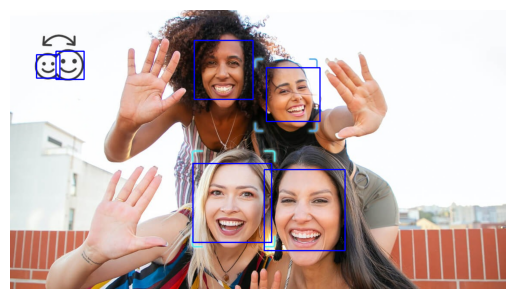

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image_path = 'face2.jpg'  # Update this to your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with faces detected
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

Model filename: ../Models/20180402-114759.pb
Instructions for updating:
Use tf.gfile.GFile.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Bounding Box Detection Time: 0.5186 seconds


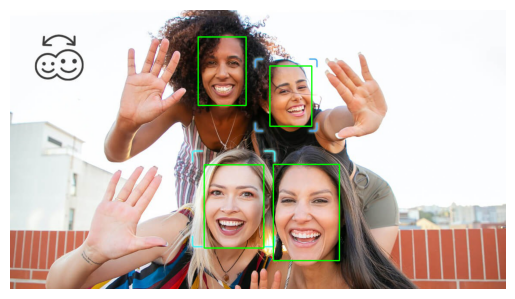

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import facenet
import align.detect_face
from PIL import Image
import time
import matplotlib.pyplot as plt

# Set constants
MINSIZE = 20
THRESHOLD = [0.6, 0.7, 0.7]
FACTOR = 0.709
INPUT_IMAGE_SIZE = 160
FACENET_MODEL_PATH = '../Models/20180402-114759.pb'  # Update with your model path

# Load the feature extraction model (Facenet)
facenet.load_model(FACENET_MODEL_PATH)

# Initialize TensorFlow session and GPU settings
tf.compat.v1.disable_eager_execution()  # Disable eager execution for compatibility
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.6)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options, log_device_placement=False))

pnet, rnet, onet = align.detect_face.create_mtcnn(sess, "align")

# Function to read and process the image
def process_image(image_path):
    # Open the image
    image = Image.open(image_path)
    image = np.array(image)
    
    # Detect faces in the image
    start_time = time.time()
    bounding_boxes, _ = align.detect_face.detect_face(image, MINSIZE, pnet, rnet, onet, THRESHOLD, FACTOR)
    end_time = time.time()
    detection_time = end_time - start_time
    
    print(f"Bounding Box Detection Time: {detection_time:.4f} seconds")
    
    faces_found = bounding_boxes.shape[0]
    if faces_found > 0:
        det = bounding_boxes[:, 0:4]
        bb = np.zeros((faces_found, 4), dtype=np.int32)

        for i in range(faces_found):
            bb[i] = det[i].astype(int)
            # Draw bounding box around the face
            cv2.rectangle(image, (bb[i][0], bb[i][1]), (bb[i][2], bb[i][3]), (0, 255, 0), 2)

    # Convert image to RGB (for displaying with matplotlib)
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Display the processed image with bounding boxes
image_path = 'face2.jpg'  # Update with your image path
processed_image = process_image(image_path)

# Display the image with bounding boxes
plt.imshow(processed_image)
plt.axis('off')  # Turn off axis
plt.show()
